In [1]:
#Program Name: Daily-XChart-line-appdata-png
#Purpose:  Daily Chart line on Ddifference data
#Author:  Greg Turmel, Director, Data Governance 
#Date:    2020.08.30 - 2021.06.30
#Errata:  0.1 Improvements can be made to script using for/looping through the databases

import os, sys, argparse, csv, pyodbc, sql, time, datetime
import sqlalchemy as db
from dotenv import load_dotenv # add this line
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import numpy as np
import matplotlib # notebook
import matplotlib.pyplot as plt
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objects as go
load_dotenv() # add this line
user = os.getenv('MySQLeUser')
password = os.getenv('MySQLeUserPass')
host = os.getenv('MySQLeHOST')
db = os.getenv('MySQLeDB')
%matplotlib inline
%load_ext sql

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DEVODSSQL;'
                      'Database=Greg;'
                      'Trusted_Connection=yes;')

sql_query01 = pd.read_sql_query(''' 
select DISTINCT TableName
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph

sql_query02 = pd.read_sql_query(''' 
select *
FROM [dbo].[tableRowCountApplicationData]
ORDER BY TableName;     
                              '''
                              ,conn) # Load the list of distinct tables to graph


df1 = pd.DataFrame(sql_query01)
df2 = pd.DataFrame(sql_query02)
df2['TodaysDate'] = df2['TodaysDate'].astype(str)
df1['TableName'].unique()

array(['AcademicContract', 'AcademicContractIntervention', 'AccessRights',
       'AccommodationToColMap', 'Addendum_Log', 'AP_SP', 'Application',
       'ApplicationAvailibility', 'ApplicationLog',
       'ApplicationSchemaVersion', 'AttendanceByMonth', 'AuditLog',
       'BallotMeasure', 'BasePicture', 'Candidate', 'CandidateResults',
       'CheckInCheckOutDetail', 'ClasStuABCYrSum', 'Cluster',
       'ClusterDemogrSummary', 'ClusterProfileSummary',
       'CombinedReportData', 'Configuration', 'Counselors', 'Course',
       'CourseCategory', 'CTI', 'D2L_AssignmentGrades', 'D2L_FinalGrades',
       'Defaults', 'DIM_AbsenceType', 'DIM_Calendar', 'DIM_ClassSchedule',
       'DIM_CodeTable', 'DIM_Course', 'DIM_CourseCategory',
       'DIM_CourseOffering', 'DIM_CoursePathways',
       'DIM_CoursePathways_12202018', 'DIM_CourseSearch',
       'DIM_DisciplineInfractionRules', 'DIM_Educator',
       'DIM_EducatorSearch', 'DIM_Employee', 'DIM_JobCode',
       'DIM_Location', 'DIM_PathwaySpe

In [4]:
df2.columns
df2 = df2.reset_index(drop=True)
df2 = df2.sort_values(by=['TableName','SchemaName','DatabaseName','TodaysDate'], ascending=[True,True,True,True])
#pd.set_option("display.max.columns", None)
df2.head(10)

,TodaysDate,DatabaseName,SchemaName,TableName,RecordCount,Ddifference
479,20201223,ApplicationData,StudentRegistration,AP_SP,0,0
478,20201224,ApplicationData,StudentRegistration,AP_SP,0,0
477,20201225,ApplicationData,StudentRegistration,AP_SP,0,0
476,20201226,ApplicationData,StudentRegistration,AP_SP,0,0
475,20201228,ApplicationData,StudentRegistration,AP_SP,0,0
432,20201229,ApplicationData,StudentRegistration,AP_SP,0,0
431,20201230,ApplicationData,StudentRegistration,AP_SP,0,0
430,20201231,ApplicationData,StudentRegistration,AP_SP,0,0
429,20210101,ApplicationData,StudentRegistration,AP_SP,0,0
428,20210104,ApplicationData,StudentRegistration,AP_SP,0,0


In [5]:
appdata001 = df2.loc[df2['TableName']=='AcademicContract']
appdata001.head(10)


,TodaysDate,DatabaseName,SchemaName,TableName,RecordCount,Ddifference
0,20201223,ApplicationData,dbo,AcademicContract,21194,0
1,20201224,ApplicationData,dbo,AcademicContract,21194,0
2,20201225,ApplicationData,dbo,AcademicContract,21194,0
3,20201226,ApplicationData,dbo,AcademicContract,21194,0
4,20201228,ApplicationData,dbo,AcademicContract,21194,0
47,20201229,ApplicationData,dbo,AcademicContract,21194,0
48,20201230,ApplicationData,dbo,AcademicContract,21194,0
49,20201231,ApplicationData,dbo,AcademicContract,21194,0
50,20210101,ApplicationData,dbo,AcademicContract,21194,0
51,20210104,ApplicationData,dbo,AcademicContract,21194,0


NameError: name 'fig' is not defined

<Figure size 432x288 with 0 Axes>

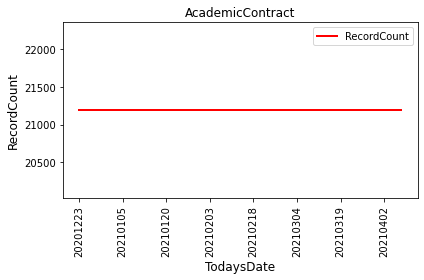

In [6]:
#https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output
plt.rcParams.update({'figure.max_open_warning': 0})

appdata001 = df2.loc[df2['TableName']=='AcademicContract']
plt.figure();
appdata001.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0);
plt.title('AppData: AcademicContract')
plt.xlabel('TodaysDate', fontsize=12)
plt.ylabel('RecordCount', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
fig1 = plt.gcf()
plt.draw()
#plt.close('all')
plt.savefig('AcademicContract.png')
plt.show()
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf:
    #pdf.savefig()  # saves the current figure into a pdf page
    #plt.close()

appdata002 = df2.loc[df2['TableName']=='AcademicContractIntervention'] 
plt.figure(); 
appdata002.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AcademicContractIntervention') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AcademicContractIntervention') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata003 = df2.loc[df2['TableName']=='AccessRights'] 
plt.figure(); 
appdata003.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AccessRights') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AccessRights') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata004 = df2.loc[df2['TableName']=='AccommodationToColMap'] 
plt.figure(); 
appdata004.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AccommodationToColMap') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AccommodationToColMap') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata005 = df2.loc[df2['TableName']=='Addendum_Log'] 
plt.figure(); 
appdata005.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Addendum_Log') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Addendum_Log') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata006 = df2.loc[df2['TableName']=='AP_SP'] 
plt.figure(); 
appdata006.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AP_SP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AP_SP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata007 = df2.loc[df2['TableName']=='Application'] 
plt.figure(); 
appdata007.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Application') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Application') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata008 = df2.loc[df2['TableName']=='ApplicationAvailibility'] 
plt.figure(); 
appdata008.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ApplicationAvailibility') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ApplicationAvailibility') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata009 = df2.loc[df2['TableName']=='ApplicationLog'] 
plt.figure(); 
appdata009.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ApplicationLog') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ApplicationLog') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata010 = df2.loc[df2['TableName']=='ApplicationSchemaVersion'] 
plt.figure(); 
appdata010.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ApplicationSchemaVersion') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ApplicationSchemaVersion') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata011 = df2.loc[df2['TableName']=='AttendanceByMonth'] 
plt.figure(); 
appdata011.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AttendanceByMonth') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AttendanceByMonth') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata012 = df2.loc[df2['TableName']=='AuditLog'] 
plt.figure(); 
appdata012.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: AuditLog') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('AuditLog') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata013 = df2.loc[df2['TableName']=='BallotMeasure'] 
plt.figure(); 
appdata013.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: BallotMeasure') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('BallotMeasure') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata014 = df2.loc[df2['TableName']=='BasePicture'] 
plt.figure(); 
appdata014.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: BasePicture') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('BasePicture') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata015 = df2.loc[df2['TableName']=='Candidate'] 
plt.figure(); 
appdata015.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Candidate') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Candidate') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata016 = df2.loc[df2['TableName']=='CandidateResults'] 
plt.figure(); 
appdata016.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: CandidateResults') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('CandidateResults') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata017 = df2.loc[df2['TableName']=='CheckInCheckOutDetail'] 
plt.figure(); 
appdata017.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: CheckInCheckOutDetail') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('CheckInCheckOutDetail') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata018 = df2.loc[df2['TableName']=='ClasStuABCYrSum'] 
plt.figure(); 
appdata018.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ClasStuABCYrSum') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ClasStuABCYrSum') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata019 = df2.loc[df2['TableName']=='Cluster'] 
plt.figure(); 
appdata019.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Cluster') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Cluster') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata020 = df2.loc[df2['TableName']=='ClusterDemogrSummary'] 
plt.figure(); 
appdata020.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ClusterDemogrSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ClusterDemogrSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata021 = df2.loc[df2['TableName']=='ClusterProfileSummary'] 
plt.figure(); 
appdata021.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ClusterProfileSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ClusterProfileSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata022 = df2.loc[df2['TableName']=='CombinedReportData'] 
plt.figure(); 
appdata022.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: CombinedReportData') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('CombinedReportData') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata023 = df2.loc[df2['TableName']=='Configuration'] 
plt.figure(); 
appdata023.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Configuration') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Configuration') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata024 = df2.loc[df2['TableName']=='Counselors'] 
plt.figure(); 
appdata024.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Counselors') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Counselors') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata025 = df2.loc[df2['TableName']=='Course'] 
plt.figure(); 
appdata025.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Course') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Course') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata026 = df2.loc[df2['TableName']=='CourseCategory'] 
plt.figure(); 
appdata026.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: CourseCategory') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('CourseCategory') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata027 = df2.loc[df2['TableName']=='CTI'] 
plt.figure(); 
appdata027.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: CTI') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('CTI') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata028 = df2.loc[df2['TableName']=='D2L_AssignmentGrades'] 
plt.figure(); 
appdata028.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: D2L_AssignmentGrades') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('D2L_AssignmentGrades') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata029 = df2.loc[df2['TableName']=='D2L_FinalGrades'] 
plt.figure(); 
appdata029.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: D2L_FinalGrades') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('D2L_FinalGrades') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata030 = df2.loc[df2['TableName']=='Defaults'] 
plt.figure(); 
appdata030.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Defaults') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Defaults') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata031 = df2.loc[df2['TableName']=='DIM_AbsenceType'] 
plt.figure(); 
appdata031.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_AbsenceType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_AbsenceType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata032 = df2.loc[df2['TableName']=='DIM_Calendar'] 
plt.figure(); 
appdata032.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Calendar') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Calendar') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata033 = df2.loc[df2['TableName']=='DIM_ClassSchedule'] 
plt.figure(); 
appdata033.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_ClassSchedule') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_ClassSchedule') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata034 = df2.loc[df2['TableName']=='DIM_CodeTable'] 
plt.figure(); 
appdata034.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CodeTable') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CodeTable') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata035 = df2.loc[df2['TableName']=='DIM_Course'] 
plt.figure(); 
appdata035.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Course') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Course') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata036 = df2.loc[df2['TableName']=='DIM_CourseCategory'] 
plt.figure(); 
appdata036.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CourseCategory') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CourseCategory') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata037 = df2.loc[df2['TableName']=='DIM_CourseOffering'] 
plt.figure(); 
appdata037.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CourseOffering') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CourseOffering') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata038 = df2.loc[df2['TableName']=='DIM_CoursePathways'] 
plt.figure(); 
appdata038.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CoursePathways') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CoursePathways') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata039 = df2.loc[df2['TableName']=='DIM_CoursePathways_12202018'] 
plt.figure(); 
appdata039.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CoursePathways_12202018') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CoursePathways_12202018') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata040 = df2.loc[df2['TableName']=='DIM_CourseSearch'] 
plt.figure(); 
appdata040.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_CourseSearch') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_CourseSearch') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata041 = df2.loc[df2['TableName']=='DIM_DisciplineInfractionRules'] 
plt.figure(); 
appdata041.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_DisciplineInfractionRules') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_DisciplineInfractionRules') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata042 = df2.loc[df2['TableName']=='DIM_Educator'] 
plt.figure(); 
appdata042.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Educator') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Educator') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata043 = df2.loc[df2['TableName']=='DIM_EducatorSearch'] 
plt.figure(); 
appdata043.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_EducatorSearch') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_EducatorSearch') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata044 = df2.loc[df2['TableName']=='DIM_Employee'] 
plt.figure(); 
appdata044.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Employee') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Employee') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata045 = df2.loc[df2['TableName']=='DIM_JobCode'] 
plt.figure(); 
appdata045.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_JobCode') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_JobCode') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata046 = df2.loc[df2['TableName']=='DIM_Location'] 
plt.figure(); 
appdata046.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Location') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Location') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata047 = df2.loc[df2['TableName']=='DIM_PathwaySpecs'] 
plt.figure(); 
appdata047.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_PathwaySpecs') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_PathwaySpecs') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata048 = df2.loc[df2['TableName']=='DIM_School'] 
plt.figure(); 
appdata048.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_School') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_School') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata049 = df2.loc[df2['TableName']=='DIM_ServiceProgramDefinition'] 
plt.figure(); 
appdata049.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_ServiceProgramDefinition') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_ServiceProgramDefinition') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata050 = df2.loc[df2['TableName']=='DIM_Student'] 
plt.figure(); 
appdata050.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Student') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Student') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata051 = df2.loc[df2['TableName']=='DIM_StudentDistrictDetail'] 
plt.figure(); 
appdata051.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_StudentDistrictDetail') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_StudentDistrictDetail') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata052 = df2.loc[df2['TableName']=='DIM_StudentEmail'] 
plt.figure(); 
appdata052.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_StudentEmail') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_StudentEmail') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata053 = df2.loc[df2['TableName']=='DIM_StudentNext'] 
plt.figure(); 
appdata053.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_StudentNext') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_StudentNext') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata054 = df2.loc[df2['TableName']=='DIM_StudentPicture'] 
plt.figure(); 
appdata054.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_StudentPicture') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_StudentPicture') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata055 = df2.loc[df2['TableName']=='DIM_StudentSearch'] 
plt.figure(); 
appdata055.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_StudentSearch') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_StudentSearch') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata056 = df2.loc[df2['TableName']=='DIM_Term'] 
plt.figure(); 
appdata056.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DIM_Term') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DIM_Term') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata057 = df2.loc[df2['TableName']=='DisplayTableMap'] 
plt.figure(); 
appdata057.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: DisplayTableMap') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('DisplayTableMap') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata058 = df2.loc[df2['TableName']=='EdLevelDemogrSummary'] 
plt.figure(); 
appdata058.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: EdLevelDemogrSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('EdLevelDemogrSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata059 = df2.loc[df2['TableName']=='EdLevelProfile'] 
plt.figure(); 
appdata059.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: EdLevelProfile') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('EdLevelProfile') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata060 = df2.loc[df2['TableName']=='ElectionType'] 
plt.figure(); 
appdata060.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ElectionType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ElectionType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata061 = df2.loc[df2['TableName']=='EnvSettings'] 
plt.figure(); 
appdata061.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: EnvSettings') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('EnvSettings') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata062 = df2.loc[df2['TableName']=='ESOL_SP'] 
plt.figure(); 
appdata062.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ESOL_SP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ESOL_SP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata063 = df2.loc[df2['TableName']=='FACT_A504'] 
plt.figure(); 
appdata063.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_A504') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_A504') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata064 = df2.loc[df2['TableName']=='FACT_AcademicContract'] 
plt.figure(); 
appdata064.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AcademicContract') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AcademicContract') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata065 = df2.loc[df2['TableName']=='FACT_AlternateTransportation'] 
plt.figure(); 
appdata065.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AlternateTransportation') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AlternateTransportation') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata066 = df2.loc[df2['TableName']=='FACT_Assessment'] 
plt.figure(); 
appdata066.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Assessment') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Assessment') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata067 = df2.loc[df2['TableName']=='FACT_AttendanceByPeriod'] 
plt.figure(); 
appdata067.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AttendanceByPeriod') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AttendanceByPeriod') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata068 = df2.loc[df2['TableName']=='FACT_AttendanceByType'] 
plt.figure(); 
appdata068.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AttendanceByType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AttendanceByType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata069 = df2.loc[df2['TableName']=='FACT_AttendanceDaily'] 
plt.figure(); 
appdata069.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AttendanceDaily') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AttendanceDaily') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata070 = df2.loc[df2['TableName']=='FACT_AttendanceDaily_History'] 
plt.figure(); 
appdata070.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_AttendanceDaily_History') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_AttendanceDaily_History') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata071 = df2.loc[df2['TableName']=='FACT_BookFines'] 
plt.figure(); 
appdata071.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_BookFines') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_BookFines') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata072 = df2.loc[df2['TableName']=='FACT_Books'] 
plt.figure(); 
appdata072.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Books') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Books') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf:
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata073 = df2.loc[df2['TableName']=='FACT_BusRoute'] 
plt.figure(); 
appdata073.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_BusRoute') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_BusRoute') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata074 = df2.loc[df2['TableName']=='FACT_Cafeteria'] 
plt.figure(); 
appdata074.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Cafeteria') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Cafeteria') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata075 = df2.loc[df2['TableName']=='FACT_CCRPI'] 
plt.figure(); 
appdata075.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_CCRPI') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_CCRPI') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata076 = df2.loc[df2['TableName']=='FACT_CheckInCheckOutDetail'] 
plt.figure(); 
appdata076.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_CheckInCheckOutDetail') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_CheckInCheckOutDetail') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata077 = df2.loc[df2['TableName']=='FACT_ClinicVisit'] 
plt.figure(); 
appdata077.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_ClinicVisit') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_ClinicVisit') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata078 = df2.loc[df2['TableName']=='FACT_CourseHistoryDetails'] 
plt.figure(); 
appdata078.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_CourseHistoryDetails') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_CourseHistoryDetails') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata079 = df2.loc[df2['TableName']=='FACT_CurrentLetterScore'] 
plt.figure(); 
appdata079.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_CurrentLetterScore') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_CurrentLetterScore') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata080 = df2.loc[df2['TableName']=='FACT_DisciplineIncident'] 
plt.figure(); 
appdata080.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_DisciplineIncident') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_DisciplineIncident') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata081 = df2.loc[df2['TableName']=='FACT_DisciplineTotal'] 
plt.figure(); 
appdata081.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_DisciplineTotal') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_DisciplineTotal') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata082 = df2.loc[df2['TableName']=='FACT_DistrictCourseMetrics'] 
plt.figure(); 
appdata082.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_DistrictCourseMetrics') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_DistrictCourseMetrics') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata083 = df2.loc[df2['TableName']=='FACT_EducatorClass'] 
plt.figure(); 
appdata083.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_EducatorClass') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_EducatorClass') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata084 = df2.loc[df2['TableName']=='FACT_EducatorClassMetrics'] 
plt.figure(); 
appdata084.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_EducatorClassMetrics') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_EducatorClassMetrics') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata085 = df2.loc[df2['TableName']=='FACT_EmergencyContact'] 
plt.figure(); 
appdata085.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_EmergencyContact') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_EmergencyContact') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata086 = df2.loc[df2['TableName']=='FACT_Enrollment'] 
plt.figure(); 
appdata086.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Enrollment') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Enrollment') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata087 = df2.loc[df2['TableName']=='FACT_EnrollmentHistory'] 
plt.figure(); 
appdata087.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_EnrollmentHistory') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_EnrollmentHistory') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata088 = df2.loc[df2['TableName']=='FACT_Fees'] 
plt.figure(); 
appdata088.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Fees') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Fees') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata089 = df2.loc[df2['TableName']=='FACT_GraduationAssessment'] 
plt.figure(); 
appdata089.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_GraduationAssessment') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw() 
plt.savefig('FACT_GraduationAssessment') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata090 = df2.loc[df2['TableName']=='FACT_Guardian'] 
plt.figure(); 
appdata090.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_Guardian') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_Guardian') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata091 = df2.loc[df2['TableName']=='FACT_IEPExport'] 
plt.figure(); 
appdata091.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_IEPExport') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_IEPExport') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata092 = df2.loc[df2['TableName']=='FACT_MedicalAlert'] 
plt.figure(); 
appdata092.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_MedicalAlert') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_MedicalAlert') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata093 = df2.loc[df2['TableName']=='FACT_PPortal_LastLogin'] 
plt.figure(); 
appdata093.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_PPortal_LastLogin') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_PPortal_LastLogin') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata094 = df2.loc[df2['TableName']=='FACT_SEI'] 
plt.figure(); 
appdata094.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_SEI') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_SEI') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata095 = df2.loc[df2['TableName']=='FACT_ServiceProgramParticipation'] 
plt.figure(); 
appdata095.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_ServiceProgramParticipation') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_ServiceProgramParticipation') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata096 = df2.loc[df2['TableName']=='FACT_SPG_Export'] 
plt.figure(); 
appdata096.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_SPG_Export') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_SPG_Export') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata097 = df2.loc[df2['TableName']=='FACT_SPortal_LastLogin'] 
plt.figure(); 
appdata097.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_SPortal_LastLogin') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_SPortal_LastLogin') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata098 = df2.loc[df2['TableName']=='FACT_StudentAcademies'] 
plt.figure(); 
appdata098.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentAcademies') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentAcademies') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata099 = df2.loc[df2['TableName']=='FACT_StudentAssignmentScore'] 
plt.figure(); 
appdata099.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentAssignmentScore') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentAssignmentScore') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata100 = df2.loc[df2['TableName']=='FACT_StudentClass'] 
plt.figure(); 
appdata100.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentClass') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentClass') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata101 = df2.loc[df2['TableName']=='FACT_StudentClassMetrics'] 
plt.figure(); 
appdata101.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentClassMetrics') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentClassMetrics') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata102 = df2.loc[df2['TableName']=='FACT_StudentClassScore'] 
plt.figure(); 
appdata102.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentClassScore') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentClassScore') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata103 = df2.loc[df2['TableName']=='FACT_StudentCoursesTaken'] 
plt.figure(); 
appdata103.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentCoursesTaken') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentCoursesTaken') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata104 = df2.loc[df2['TableName']=='FACT_StudentCreditsEarned'] 
plt.figure(); 
appdata104.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentCreditsEarned') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentCreditsEarned') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata105 = df2.loc[df2['TableName']=='FACT_StudentEngagementInstrument'] 
plt.figure(); 
appdata105.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentEngagementInstrument') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentEngagementInstrument') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata106 = df2.loc[df2['TableName']=='FACT_StudentEnrollmentPeriods'] 
plt.figure(); 
appdata106.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentEnrollmentPeriods') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentEnrollmentPeriods') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata107 = df2.loc[df2['TableName']=='FACT_StudentMetaData'] 
plt.figure(); 
appdata107.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentMetaData') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentMetaData') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata108 = df2.loc[df2['TableName']=='FACT_StudentRegisterDaily'] 
plt.figure(); 
appdata108.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentRegisterDaily') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentRegisterDaily') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata109 = df2.loc[df2['TableName']=='FACT_StudentSchoolYear'] 
plt.figure(); 
appdata109.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentSchoolYear') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentSchoolYear') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata110 = df2.loc[df2['TableName']=='FACT_StudentSibling'] 
plt.figure(); 
appdata110.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentSibling') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentSibling') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata111 = df2.loc[df2['TableName']=='FACT_StudentTrendingGrades'] 
plt.figure(); 
appdata111.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentTrendingGrades') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentTrendingGrades') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata112 = df2.loc[df2['TableName']=='FACT_StudentTrendingGrades_20180101'] 
plt.figure(); 
appdata112.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentTrendingGrades_20180101') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentTrendingGrades_20180101')
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata113 = df2.loc[df2['TableName']=='FACT_StudentTrendingGrades_20180328'] 
plt.figure(); 
appdata113.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_StudentTrendingGrades_20180328') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_StudentTrendingGrades_20180328') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata114 = df2.loc[df2['TableName']=='FACT_TeacherViewTrendingGrades'] 
plt.figure(); 
appdata114.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_TeacherViewTrendingGrades') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_TeacherViewTrendingGrades') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata115 = df2.loc[df2['TableName']=='FACT_YearlyAttendance'] 
plt.figure(); 
appdata115.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: FACT_YearlyAttendance') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('FACT_YearlyAttendance') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata116 = df2.loc[df2['TableName']=='G_GBATCH'] 
plt.figure(); 
appdata116.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GBATCH') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GBATCH') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata117 = df2.loc[df2['TableName']=='G_GTID_HISTORY'] 
plt.figure(); 
appdata117.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GTID_HISTORY') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GTID_HISTORY') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata118 = df2.loc[df2['TableName']=='G_GTID_IMPORT'] 
plt.figure(); 
appdata118.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GTID_IMPORT') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GTID_IMPORT') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata119 = df2.loc[df2['TableName']=='G_GTID_IMPORT_ERROR_CODES'] 
plt.figure(); 
appdata119.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GTID_IMPORT_ERROR_CODES') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GTID_IMPORT_ERROR_CODES') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata120 = df2.loc[df2['TableName']=='G_GTID_IMPORT_ERRORS'] 
plt.figure(); 
appdata120.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GTID_IMPORT_ERRORS') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GTID_IMPORT_ERRORS') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata121 = df2.loc[df2['TableName']=='G_GTID_STU_BATCH'] 
plt.figure(); 
appdata121.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: G_GTID_STU_BATCH') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('G_GTID_STU_BATCH') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata122 = df2.loc[df2['TableName']=='GradeLevel'] 
plt.figure(); 
appdata122.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: GradeLevel') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('GradeLevel') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata123 = df2.loc[df2['TableName']=='GTRegistrationSP'] 
plt.figure(); 
appdata123.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: GTRegistrationSP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('GTRegistrationSP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata124 = df2.loc[df2['TableName']=='HomeSchoolCounselorsSP'] 
plt.figure(); 
appdata124.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: HomeSchoolCounselorsSP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('HomeSchoolCounselorsSP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata125 = df2.loc[df2['TableName']=='HSGradeSummary'] 
plt.figure(); 
appdata125.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: HSGradeSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('HSGradeSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata126 = df2.loc[df2['TableName']=='HSSElectives'] 
plt.figure(); 
appdata126.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: HSSElectives') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('HSSElectives') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata127 = df2.loc[df2['TableName']=='IEPAccommodations'] 
plt.figure(); 
appdata127.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: IEPAccommodations') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('IEPAccommodations') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata128 = df2.loc[df2['TableName']=='ImageSource'] 
plt.figure(); 
appdata128.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ImageSource') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ImageSource') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata129 = df2.loc[df2['TableName']=='Language'] 
plt.figure(); 
appdata129.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Language') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Language') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata130 = df2.loc[df2['TableName']=='LocationType'] 
plt.figure(); 
appdata130.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: LocationType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('LocationType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata131 = df2.loc[df2['TableName']=='LocationTypeOption'] 
plt.figure(); 
appdata131.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: LocationTypeOption') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('LocationTypeOption') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()
    
appdata132 = df2.loc[df2['TableName']=='Log4Net'] 
plt.figure(); 
appdata132.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Log4Net') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Log4Net') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata133 = df2.loc[df2['TableName']=='MAP_EducatorStudentCourse'] 
plt.figure(); 
appdata133.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MAP_EducatorStudentCourse') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MAP_EducatorStudentCourse') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata134 = df2.loc[df2['TableName']=='MasterListSP'] 
plt.figure(); 
appdata134.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MasterListSP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MasterListSP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata135 = df2.loc[df2['TableName']=='MeasureCluster'] 
plt.figure(); 
appdata135.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MeasureCluster') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MeasureCluster') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata136 = df2.loc[df2['TableName']=='MeasureResults'] 
plt.figure(); 
appdata136.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MeasureResults') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MeasureResults') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata137 = df2.loc[df2['TableName']=='MediaCheckInType'] 
plt.figure(); 
appdata137.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MediaCheckInType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MediaCheckInType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata138 = df2.loc[df2['TableName']=='MHSElectives'] 
plt.figure(); 
appdata138.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MHSElectives') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MHSElectives') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata139 = df2.loc[df2['TableName']=='MSGradeSummary'] 
plt.figure(); 
appdata139.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: MSGradeSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('MSGradeSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata140 = df2.loc[df2['TableName']=='Office'] 
plt.figure(); 
appdata140.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Office') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Office') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata141 = df2.loc[df2['TableName']=='OfficeCluster'] 
plt.figure(); 
appdata141.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: OfficeCluster') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('OfficeCluster') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()
    
appdata142 = df2.loc[df2['TableName']=='OpenHouse'] 
plt.figure(); 
appdata142.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: OpenHouse') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('OpenHouse') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata143 = df2.loc[df2['TableName']=='PartyType'] 
plt.figure(); 
appdata143.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: PartyType') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('PartyType') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata144 = df2.loc[df2['TableName']=='ProdStudentTrendingGrades'] 
plt.figure(); 
appdata144.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ProdStudentTrendingGrades') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ProdStudentTrendingGrades') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata145 = df2.loc[df2['TableName']=='ProgramChoices'] 
plt.figure(); 
appdata145.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ProgramChoices') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ProgramChoices') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata146 = df2.loc[df2['TableName']=='Registration'] 
plt.figure(); 
appdata146.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Registration') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Registration') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata147 = df2.loc[df2['TableName']=='RegistrationSP'] 
plt.figure(); 
appdata147.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RegistrationSP') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RegistrationSP') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata148 = df2.loc[df2['TableName']=='RegistrationStatus'] 
plt.figure(); 
appdata148.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RegistrationStatus') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RegistrationStatus') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata149 = df2.loc[df2['TableName']=='RejectReason'] 
plt.figure(); 
appdata149.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RejectReason') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RejectReason') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata150 = df2.loc[df2['TableName']=='Role'] 
plt.figure(); 
appdata150.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Role') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Role') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata151 = df2.loc[df2['TableName']=='RolePermission'] 
plt.figure(); 
appdata151.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RolePermission') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RolePermission') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata152 = df2.loc[df2['TableName']=='ROSTER_GSC'] 
plt.figure(); 
appdata152.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ROSTER_GSC') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ROSTER_GSC') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata153 = df2.loc[df2['TableName']=='ROSTER_GSS'] 
plt.figure(); 
appdata153.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: ROSTER_GSS') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('ROSTER_GSS') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata154 = df2.loc[df2['TableName']=='RUN'] 
plt.figure(); 
appdata154.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RUN') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RUN') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata155 = df2.loc[df2['TableName']=='RUN_ITEM'] 
plt.figure(); 
appdata155.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RUN_ITEM') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RUN_ITEM') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata156 = df2.loc[df2['TableName']=='RUN_PACKAGE_OVERRIDES'] 
plt.figure(); 
appdata156.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: RUN_PACKAGE_OVERRIDES') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('RUN_PACKAGE_OVERRIDES') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata157 = df2.loc[df2['TableName']=='School'] 
plt.figure(); 
appdata157.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: School') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('School') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata158 = df2.loc[df2['TableName']=='SchoolConfiguration'] 
plt.figure(); 
appdata158.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolConfiguration') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolConfiguration') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata159 = df2.loc[df2['TableName']=='SchoolDemogrSummary'] 
plt.figure(); 
appdata159.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolDemogrSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolDemogrSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata160 = df2.loc[df2['TableName']=='SchoolLocation'] 
plt.figure(); 
appdata160.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolLocation') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolLocation') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata161 = df2.loc[df2['TableName']=='SchoolProfileSummary'] 
plt.figure(); 
appdata161.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolProfileSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolProfileSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata162 = df2.loc[df2['TableName']=='SchoolSetting'] 
plt.figure(); 
appdata162.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolSetting') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolSetting') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata163 = df2.loc[df2['TableName']=='SchoolTchStuCounts'] 
plt.figure(); 
appdata163.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SchoolTchStuCounts') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SchoolTchStuCounts') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata164 = df2.loc[df2['TableName']=='SecurityToken'] 
plt.figure(); 
appdata164.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SecurityToken') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SecurityToken') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata165 = df2.loc[df2['TableName']=='State'] 
plt.figure(); 
appdata165.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: State') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('State') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata166 = df2.loc[df2['TableName']=='StudentCurrentYearSummary'] 
plt.figure(); 
appdata166.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: StudentCurrentYearSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('StudentCurrentYearSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata167 = df2.loc[df2['TableName']=='StudentTeacherSchedule'] 
plt.figure(); 
appdata167.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: StudentTeacherSchedule') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('StudentTeacherSchedule') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata168 = df2.loc[df2['TableName']=='Submission'] 
plt.figure(); 
appdata168.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Submission') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Submission') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata169 = df2.loc[df2['TableName']=='Submission_Original'] 
plt.figure(); 
appdata169.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Submission_Original') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Submission_Original') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata170 = df2.loc[df2['TableName']=='SubmissionHistory'] 
plt.figure(); 
appdata170.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SubmissionHistory') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SubmissionHistory') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata171 = df2.loc[df2['TableName']=='SubmissionState'] 
plt.figure(); 
appdata171.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: SubmissionState') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('SubmissionState') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata172 = df2.loc[df2['TableName']=='Survey_Report_Codes'] 
plt.figure(); 
appdata172.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Survey_Report_Codes') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Survey_Report_Codes') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata173 = df2.loc[df2['TableName']=='Survey_Report_Summary'] 
plt.figure(); 
appdata173.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Survey_Report_Summary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Survey_Report_Summary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata174 = df2.loc[df2['TableName']=='Survey_Respondent_Report'] 
plt.figure(); 
appdata174.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: Survey_Respondent_Report') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('Survey_Respondent_Report') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata175 = df2.loc[df2['TableName']=='sysdiagrams'] 
plt.figure(); 
appdata175.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: sysdiagrams') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('sysdiagrams') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata176 = df2.loc[df2['TableName']=='TeacherStudentSummary'] 
plt.figure(); 
appdata176.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: TeacherStudentSummary') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('TeacherStudentSummary') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata177 = df2.loc[df2['TableName']=='TPP_Notes'] 
plt.figure(); 
appdata177.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: TPP_Notes') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('TPP_Notes') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata178 = df2.loc[df2['TableName']=='TypeCode'] 
plt.figure(); 
appdata178.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: TypeCode') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('TypeCode') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata179 = df2.loc[df2['TableName']=='User'] 
plt.figure(); 
appdata179.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: User') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('User') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata180 = df2.loc[df2['TableName']=='UserComments'] 
plt.figure(); 
appdata180.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: UserComments') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('UserComments') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata181 = df2.loc[df2['TableName']=='UserPermission'] 
plt.figure(); 
appdata181.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: UserPermission') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('UserPermission') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata182 = df2.loc[df2['TableName']=='UserRolePermission'] 
plt.figure(); 
appdata182.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: UserRolePermission') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('UserRolePermission') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()

appdata183 = df2.loc[df2['TableName']=='UserRoles'] 
plt.figure(); 
appdata183.plot(x='TodaysDate', y='RecordCount', color='r', linewidth=2.0); 
plt.title('AppData: UserRoles') 
plt.xlabel('TodaysDate', fontsize=12) 
plt.ylabel('RecordCount', fontsize=12) 
plt.xticks(rotation=90) 
plt.tight_layout()
fig1 = plt.gcf()
#plt.show()
plt.draw()
plt.savefig('UserRoles') 
time.sleep(1)
#with PdfPages('multipage.pdf') as pdf: 
    #pdf.savefig()  # saves the current figure into a pdf page 
    #plt.close()
    

In [ ]:
# Clean up your plots after you are done with them:
# plt.close(fig)

plt.close('all')

In [ ]:
#import time
time.sleep(1) # Sleep for 1 seconds
print(' *** Note: tblRowCountAppDataWdata.csv file written - continue program ***')